**Especialización en analítica y ciencia de datos**.

**Monografía**

**Análisis Integral de clasificación de usuarios -
SISBEN - Año 2017**

Autores: Jorge Luis Genes Padilla - John Byron Alzate Hernández

**1. Importación de librerías importantes y necesarias.**

In [ ]:
# Importación de librerias necesarias para los diferentes análisis:

# Tratamiento de datos
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
import warnings

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report, auc, roc_curve, precision_score,
                             recall_score, r2_score, mean_squared_error, mean_absolute_error,
                             roc_auc_score, median_absolute_error, accuracy_score)
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score


# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot')

# Configuración warnings
warnings.filterwarnings('ignore')



/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


**2. Importación y visualización del dataset inicial.**

In [ ]:
# Lectura del archivo CSV que contiene la información original en estado base:
df = pd.read_csv('bd_entrega_4.csv', delimiter=';')
df

,COMUNA,TELEFONO,VIVIENDA,PARED,PISO,ENERGIA,ALCANTA,GAS,BASURA,ACUEDUC,...,DISCAPA,CARNET,EMBARAZA,ASISTE,TIPOESTA,GRADO,NIVEL,INGRESOS,PERCIBE,PUNTAJE
0,1,1,1,2,3,1,1,2,1,1,...,0,4,1,2,0,3,1,0,1,28.34
1,1,1,1,2,3,1,1,2,1,1,...,0,4,2,2,0,5,1,0,2,22.28
2,1,1,1,2,3,1,1,2,1,1,...,0,4,1,2,0,5,1,0,2,22.28
3,1,1,1,2,3,1,1,2,1,1,...,0,4,2,2,0,5,1,0,1,22.28
4,1,1,1,2,3,1,1,2,1,1,...,7,4,2,2,0,5,1,0,2,22.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048530,7,2,1,1,2,1,1,2,1,1,...,0,0,2,1,4,1,1,0,2,32.57
1048531,7,1,1,1,2,1,1,1,1,1,...,0,4,2,2,0,0,0,100000,1,31.97
1048532,7,1,1,1,2,1,1,1,1,1,...,0,4,1,2,0,3,1,0,2,31.97
1048533,7,1,1,1,2,1,1,1,1,1,...,0,3,2,2,0,0,0,0,2,31.97


Después de obtener el resumen estadístico, se visualizan los nombres de todas las columnas del DataFrame utilizando `df.columns`. El resultado muestra que el DataFrame incluye variables como `COMUNA`, `VIVIENDA`, `ESTRATO`, `SEXO`, `EDAD`, `AgeCategory` y `Puntaje_Categorico`, entre otras. Esto confirma que las nuevas columnas creadas (`EDAD`, `AgeCategory` y `Puntaje_Categorico`) se han añadido correctamente al DataFrame.

**3. Tratamiento de datos:**

Para el tratamiento de datos propuesto, se convierte la columna `FECHANTO` a fechas y se calcula la edad de cada individuo, almacenándola en `EDAD`. Luego, se clasifica las edades en categorías como "Underage", "Young", "Adult", "Old" y "Very old" en la columna `AgeCategory`. También se categoriza el puntaje SISBEN en "Bajo" y "Alto" en la columna `Puntaje_Categorico`. Finalmente, se elimina la columna `PUNTAJE` original y remueve registros duplicados, mostrando el DataFrame resultante para verificar las operaciones.

In [ ]:
# Conversión la columna "FECHANTO" a formato de fecha y calcular la edad
df['EDAD'] = pd.Timestamp.today().year - pd.to_datetime(df.pop('FECHANTO'), format='%d/%m/%Y').dt.year

In [ ]:
# la columna "EDAD" según los nuevos rangos y categorías proporcionadas

bins = [-np.inf, 17, 29, 49, 69, np.inf]
labels = ["Underage", "Young", "Adult", "Old", "Very old"]
df['AgeCategory'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=True)

In [ ]:
# Crear una variable 'Puntaje_Categorico' para categorizar la variable de salida 'PUNTAJE'
def categorize_puntaje(score):
    if 0 <= score <= 40:
        return "Bajo"
    else:
        return "Alto"

df['Puntaje_Categorico'] = df['PUNTAJE'].apply(categorize_puntaje)

In [ ]:
# Eliminar la columna 'Puntaje' y eliminar registros duplicados.
df.drop('PUNTAJE', axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
# Ver los resultados de las operaciones hasta el momento
df

,COMUNA,TELEFONO,VIVIENDA,PARED,PISO,ENERGIA,ALCANTA,GAS,BASURA,ACUEDUC,...,EMBARAZA,ASISTE,TIPOESTA,GRADO,NIVEL,INGRESOS,PERCIBE,EDAD,AgeCategory,Puntaje_Categorico
0,1,1,1,2,3,1,1,2,1,1,...,1,2,0,3,1,0,1,72,Very old,Bajo
1,1,1,1,2,3,1,1,2,1,1,...,2,2,0,5,1,0,2,93,Very old,Bajo
2,1,1,1,2,3,1,1,2,1,1,...,1,2,0,5,1,0,2,87,Very old,Bajo
3,1,1,1,2,3,1,1,2,1,1,...,2,2,0,5,1,0,1,55,Old,Bajo
4,1,1,1,2,3,1,1,2,1,1,...,2,2,0,5,1,0,2,44,Adult,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048530,7,2,1,1,2,1,1,2,1,1,...,2,1,4,1,1,0,2,16,Underage,Bajo
1048531,7,1,1,1,2,1,1,1,1,1,...,2,2,0,0,0,100000,1,93,Very old,Bajo
1048532,7,1,1,1,2,1,1,1,1,1,...,1,2,0,3,1,0,2,68,Old,Bajo
1048533,7,1,1,1,2,1,1,1,1,1,...,2,2,0,0,0,0,2,10,Underage,Bajo


In [ ]:
# Obtener y ver un resumen numérico estadistico de los datos
df.describe()

,COMUNA,TELEFONO,VIVIENDA,PARED,PISO,ENERGIA,ALCANTA,GAS,BASURA,ACUEDUC,...,DISCAPA,CARNET,EMBARAZA,ASISTE,TIPOESTA,GRADO,NIVEL,INGRESOS,PERCIBE,EDAD
count,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,...,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06,1.033452e+06
mean,3.988210e+00,1.212070e+00,1.032379e+00,1.252123e+00,2.439165e+00,1.000569e+00,1.047880e+00,1.491647e+00,1.001011e+00,1.008899e+00,...,1.099848e-01,2.295249e+00,1.707565e+00,1.708284e+00,1.074464e+00,3.238634e+00,1.419800e+00,1.447396e+05,1.605013e+00,4.131414e+01
std,2.006360e+00,4.087742e-01,1.770534e-01,7.914598e-01,5.816255e-01,2.384625e-02,2.135131e-01,4.999305e-01,3.178290e-02,9.391545e-02,...,7.958502e-01,1.659756e+00,4.548815e-01,4.545523e-01,1.760193e+00,2.210197e+00,9.353699e-01,2.734398e+05,4.888481e-01,2.016044e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00
25%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.600000e+01
50%,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.800000e+01
75%,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00,2.000000e+00,2.000000e+05,2.000000e+00,5.600000e+01
max,7.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00,6.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00,6.000000e+00,5.000000e+00,1.500000e+07,2.000000e+00,1.220000e+02


**4. Estadística descriptiva.**

In [ ]:
# Obtener y ver un resumen numérico estadistico de los datos
df.columns

Index(['COMUNA', 'TELEFONO', 'VIVIENDA', 'PARED', 'PISO', 'ENERGIA', 'ALCANTA',
       'GAS', 'BASURA', 'ACUEDUC', 'ESTRATO', 'ELIMBASURA', 'THOGAR',
       'TENEVIV', 'USOSANI', 'USANITAR', 'DUCHA', 'AGUA', 'LLEGA', 'SUMINIS',
       'PREPARAN', 'COCINA', 'COCINAN', 'ALUMBRA', 'USOTELE', 'NEVERA',
       'LAVADORA', 'TVCOLOR', 'TVCABLE', 'CALENTA', 'HORNO', 'AIRE',
       'COMPUTADOR', 'MOTO', 'AUTO1', 'SEXO', 'PARENTES', 'ESTCIVIL',
       'CONYUVIVE', 'DISCAPA', 'CARNET', 'EMBARAZA', 'ASISTE', 'TIPOESTA',
       'GRADO', 'NIVEL', 'INGRESOS', 'PERCIBE', 'EDAD', 'AgeCategory',
       'Puntaje_Categorico'],
      dtype='object')

**Transformación de Columnas para tratamiento de datos posterior en el modelamiento**

In [ ]:
# Lista de columnas a convertir a tipo 'object'
columns_to_object = ['COMUNA', 'TELEFONO', 'VIVIENDA','ENERGIA', 'ALCANTA',
                      'GAS', 'ACUEDUC', 'ESTRATO', 'TENEVIV', 'AGUA', 'NEVERA', 'LAVADORA', 'TVCOLOR',
                      'CALENTA','COMPUTADOR', 'AUTO1', 'SEXO', 'ESTCIVIL',
                      'ASISTE', 'NIVEL', 'PERCIBE', 'AgeCategory', 'Puntaje_Categorico']

# Definición para convertir columna 'INGRESOS' a tipo 'float64'
columns_to_number = ['INGRESOS']

# Lista completa de columnas en el orden deseado
all_columns = columns_to_object[:columns_to_object.index('PERCIBE') + 1] + columns_to_number + columns_to_object[columns_to_object.index('PERCIBE') + 1:]

# Filtrar el DataFrame para que solo contenga las columnas especificadas en el orden correcto
df = df[all_columns]

# Cambiar las columnas a formato 'object'
df[columns_to_object] = df[columns_to_object].astype('object')

# Cambiar la columna 'INGRESOS' a formato 'float64'
df[columns_to_number] = df[columns_to_number].astype('float64')

In [ ]:
# Ver las columnas del dataframe
df.columns

Index(['COMUNA', 'TELEFONO', 'VIVIENDA', 'ENERGIA', 'ALCANTA', 'GAS',
       'ACUEDUC', 'ESTRATO', 'TENEVIV', 'AGUA', 'NEVERA', 'LAVADORA',
       'TVCOLOR', 'CALENTA', 'COMPUTADOR', 'AUTO1', 'SEXO', 'ESTCIVIL',
       'ASISTE', 'NIVEL', 'PERCIBE', 'INGRESOS', 'AgeCategory',
       'Puntaje_Categorico'],
      dtype='object')

In [ ]:
# Ver los tipos de datos de cada una de las columnas del dataframe
df.dtypes

COMUNA                 object
TELEFONO               object
VIVIENDA               object
ENERGIA                object
ALCANTA                object
GAS                    object
ACUEDUC                object
ESTRATO                object
TENEVIV                object
AGUA                   object
NEVERA                 object
LAVADORA               object
TVCOLOR                object
CALENTA                object
COMPUTADOR             object
AUTO1                  object
SEXO                   object
ESTCIVIL               object
ASISTE                 object
NIVEL                  object
PERCIBE                object
INGRESOS              float64
AgeCategory            object
Puntaje_Categorico     object
dtype: object

**Análisis Gráfico**

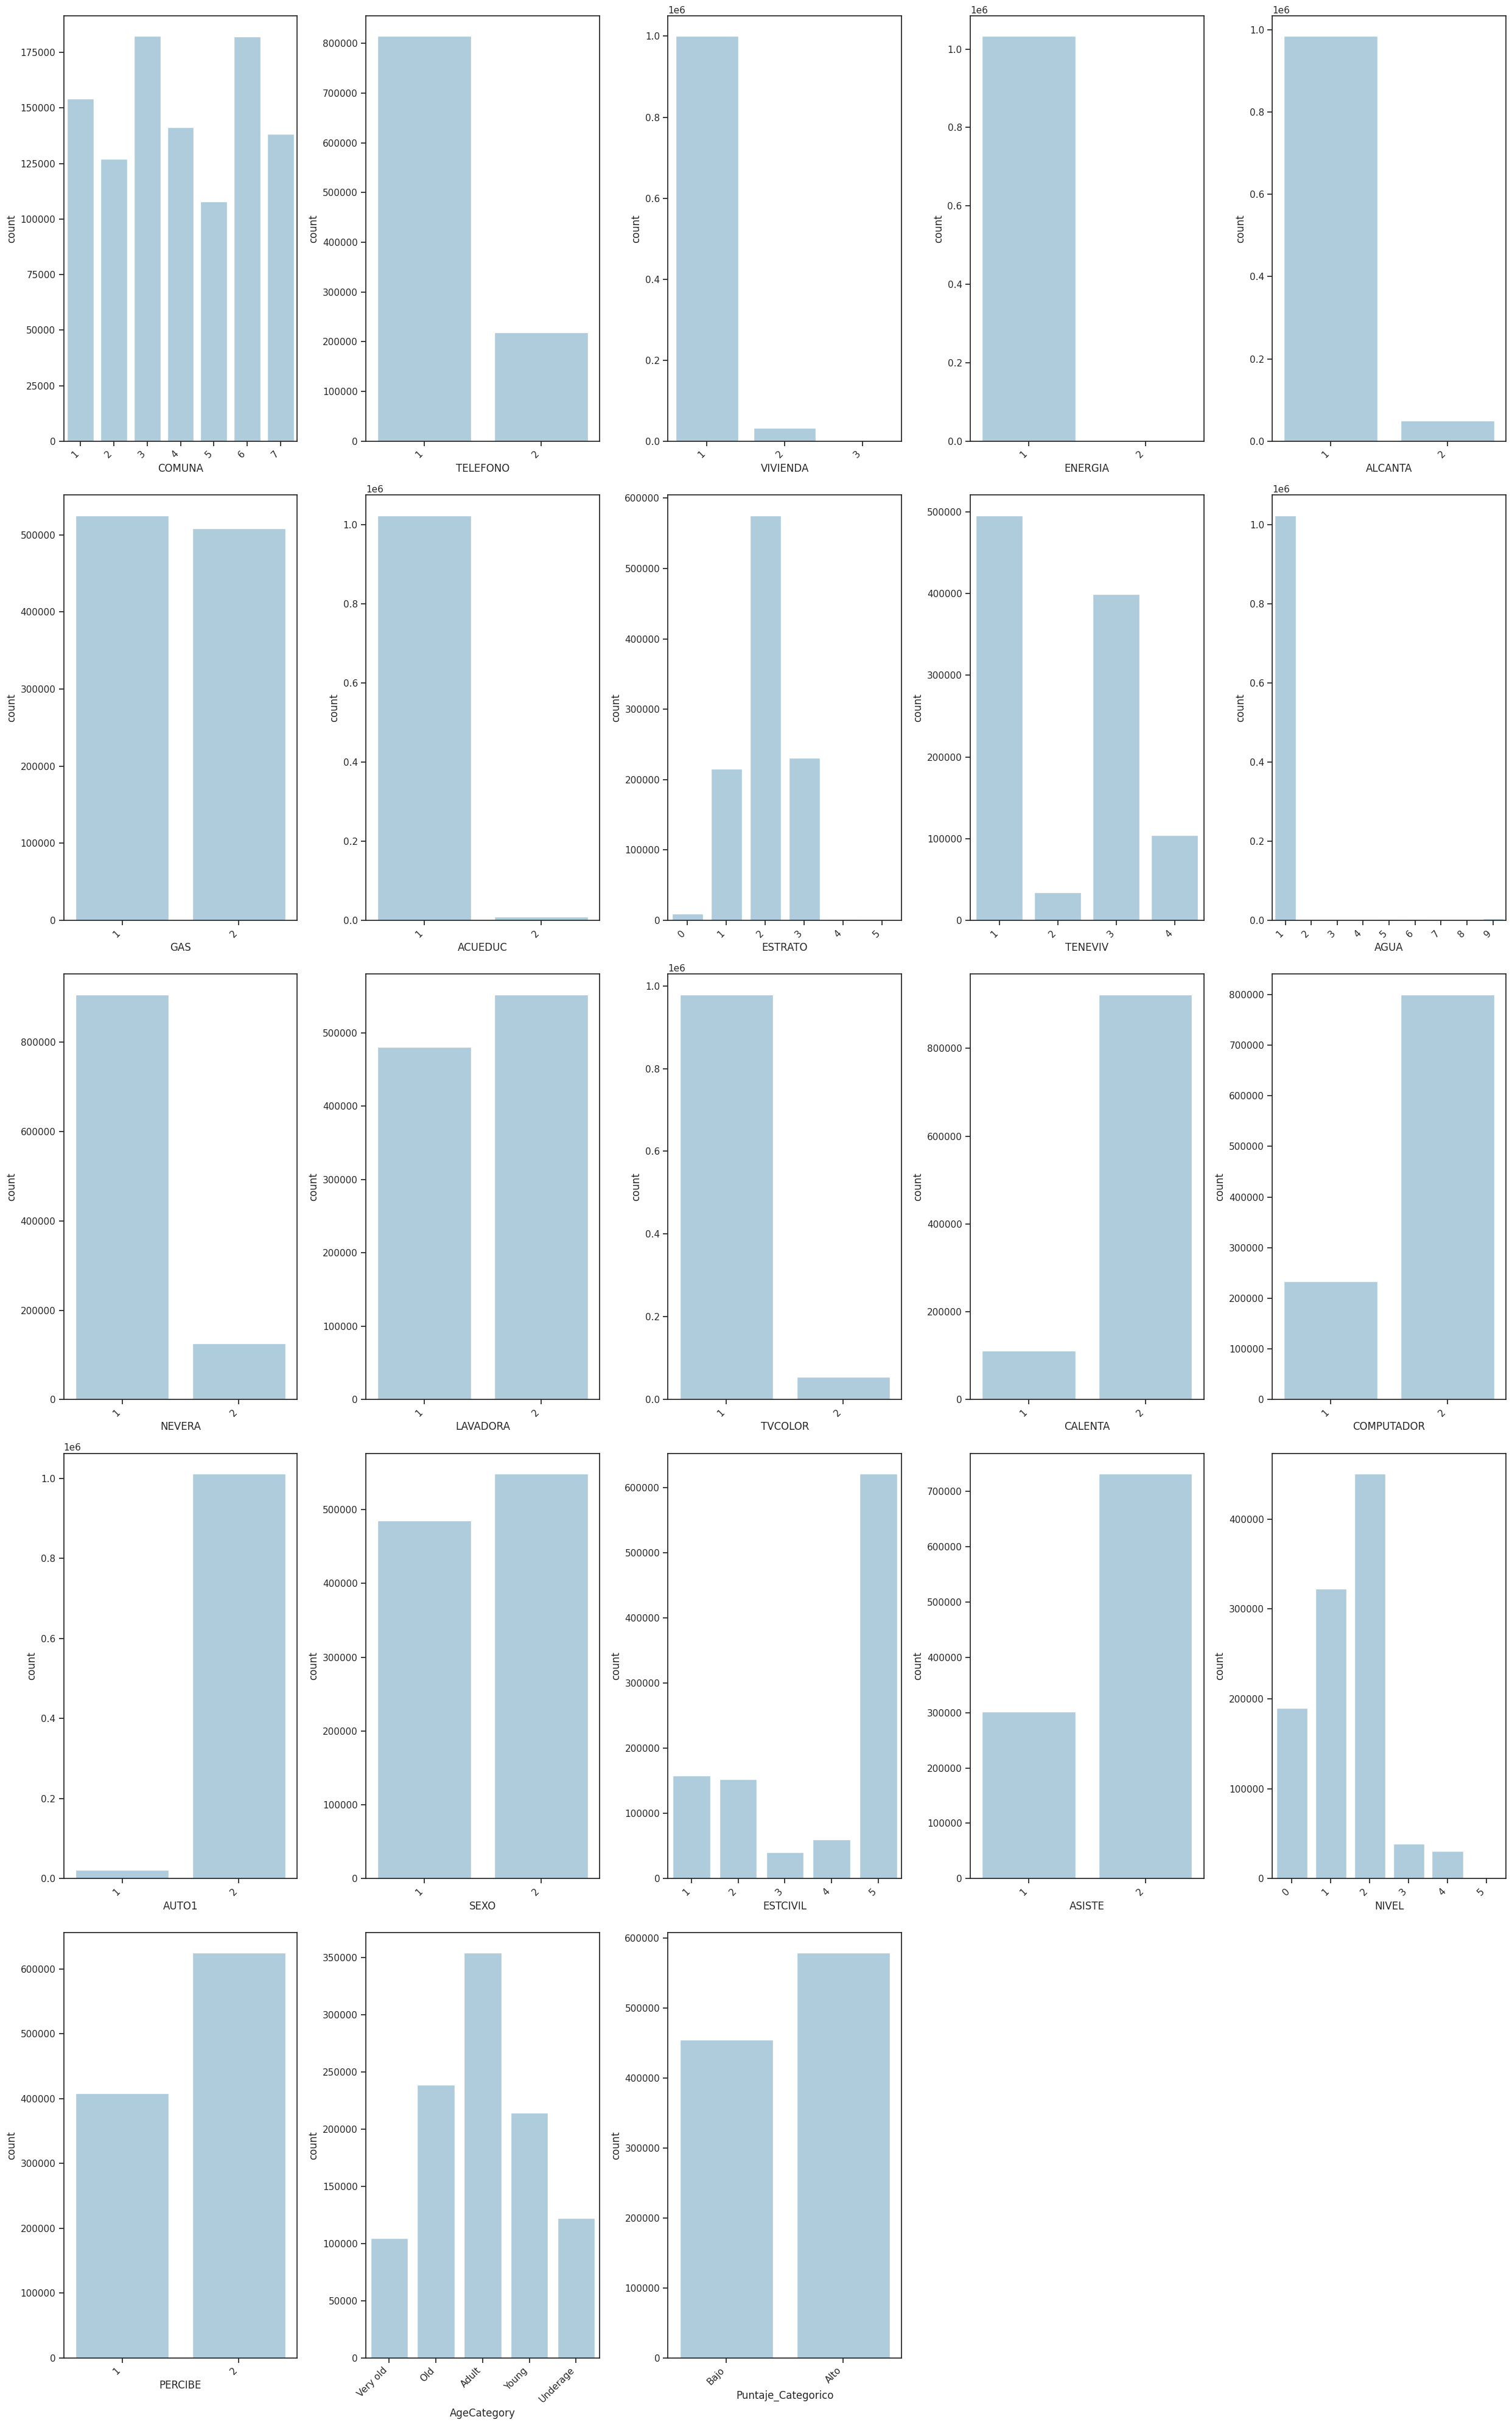

In [ ]:
# Establecer las variables categóricas con la caracteristica tipo objeto
categorical_features = df.select_dtypes(include=[object])

# Establecer estilos de Seaborn
sns.set(palette='Paired', style="ticks")

# Determinar el número de filas y columnas para subgráficos
n_features = len(categorical_features.columns)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

# Realizar los gráficos de las variables categóricas
plt.figure(figsize=(25, 40), tight_layout=True)
for i, feature in enumerate(categorical_features, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=feature, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

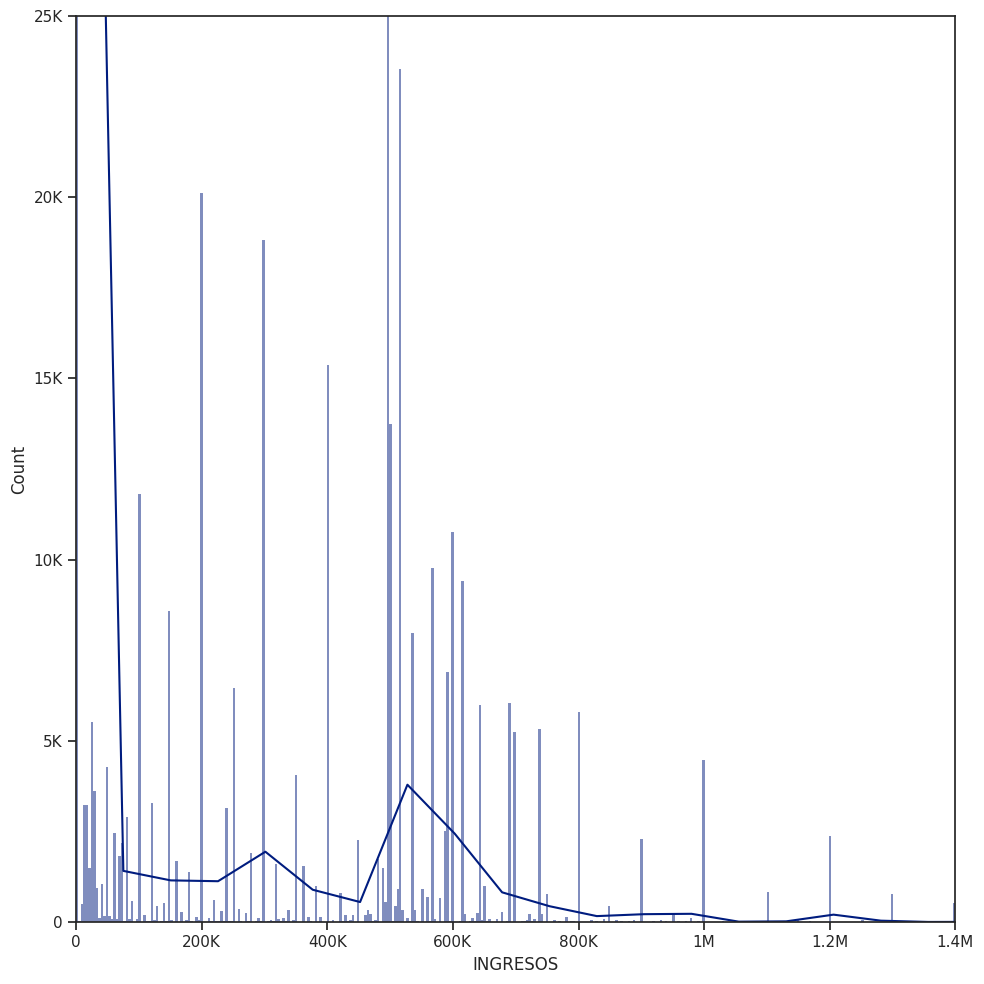

In [ ]:
# Establecer las variables numéricas del dataset
numeric_features = df.select_dtypes(include=[np.number])

# Establecer estilos de Seaborn
sns.set(palette='dark', style="ticks")

# Configurar el número de filas y columnas para subgráficos en 2x2
n_cols = 1
n_rows = 1

# Graficar las variables numéricas del dataset
plt.figure(figsize=(10, 10), tight_layout=True)  # Ajustar el tamaño de la figura
for i, feature in enumerate(numeric_features.columns, 1):
    if i > 5:
        break
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel("Número de Observaciones (datos)")
    plt.xlim(0, 1.4e6)  # Establecer los límites del eje x de 0 a 1,400,000
    plt.ylim(0, 25000)  # Establecer los límites del eje y de 0 a 25 mil
    plt.xticks(np.arange(0, 1.4e6 + 1, 2e5), ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M'])
    plt.yticks(np.arange(0, 25001, 5000), ['0', '5K', '10K', '15K', '20K', '25K'])

plt.show()

**Transformación, separación y tratamiento de la variable de salida**

In [ ]:
# Agrupar el DF por Puntaje Categorico y contar los valores de cada categoria
df.groupby('Puntaje_Categorico').Puntaje_Categorico.count().sort_values(ascending=False)

Puntaje_Categorico
Alto    578848
Bajo    454604
Name: Puntaje_Categorico, dtype: int64

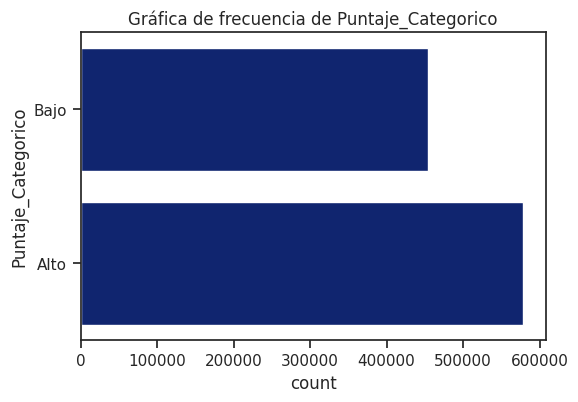

In [ ]:
# Graficar la proporción de Puntaje Categorico
plt.figure(figsize=(6,4))
plt.title('Gráfica de frecuencia de Puntaje_Categorico')
sns.countplot(df.Puntaje_Categorico)
plt.show()

**Identificar el comportamiento de la variable numérica**

<Figure size 1000x600 with 0 Axes>

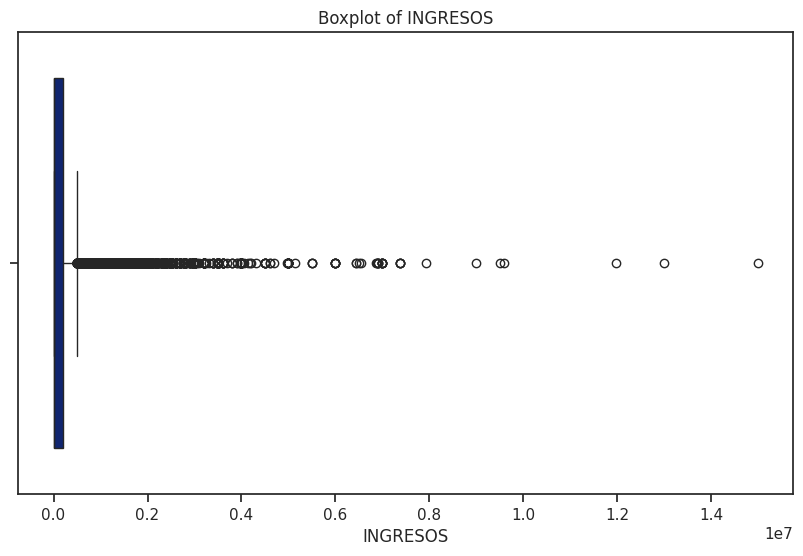

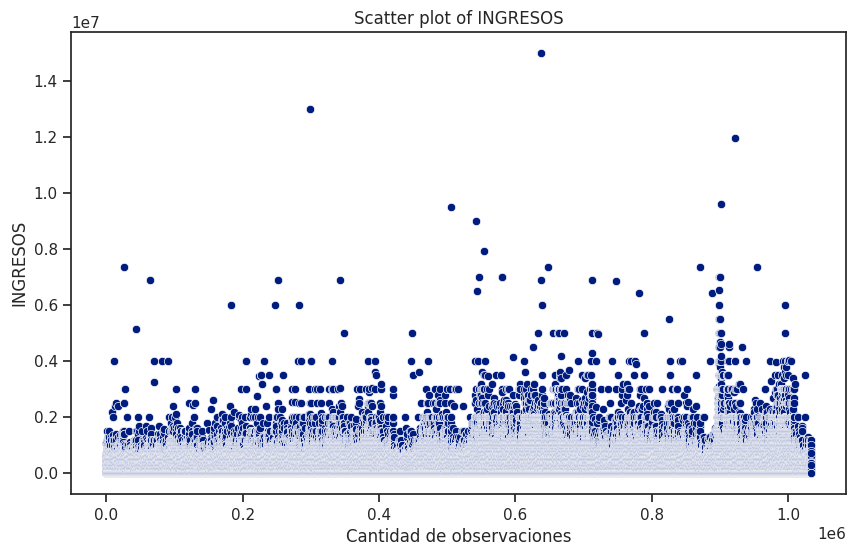

In [ ]:
# Definición de columnas categóricas y numéricas
columns_to_object_disp = ['COMUNA', 'TELEFONO', 'VIVIENDA', 'ENERGIA', 'ALCANTA',
                     'GAS', 'ACUEDUC', 'ESTRATO', 'TENEVIV', 'AGUA', 'NEVERA', 'LAVADORA', 'TVCOLOR',
                     'CALENTA', 'COMPUTADOR', 'AUTO1', 'SEXO', 'ESTCIVIL',
                     'ASISTE', 'NIVEL', 'PERCIBE', 'AgeCategory', 'Puntaje_Categorico']
numeric_columns_disp = ['INGRESOS']

# Visualización de boxplots para identificar outliers en las variables numéricas
plt.figure(figsize=(10, 6))
for col in numeric_columns_disp:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Visualización de scatter plots para identificar outliers en las variables numéricas
for col in numeric_columns_disp:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=np.arange(len(df[col])), y=df[col])
    plt.title(f'Scatter plot of {col}')
    plt.xlabel('Cantidad de observaciones')
    plt.show()


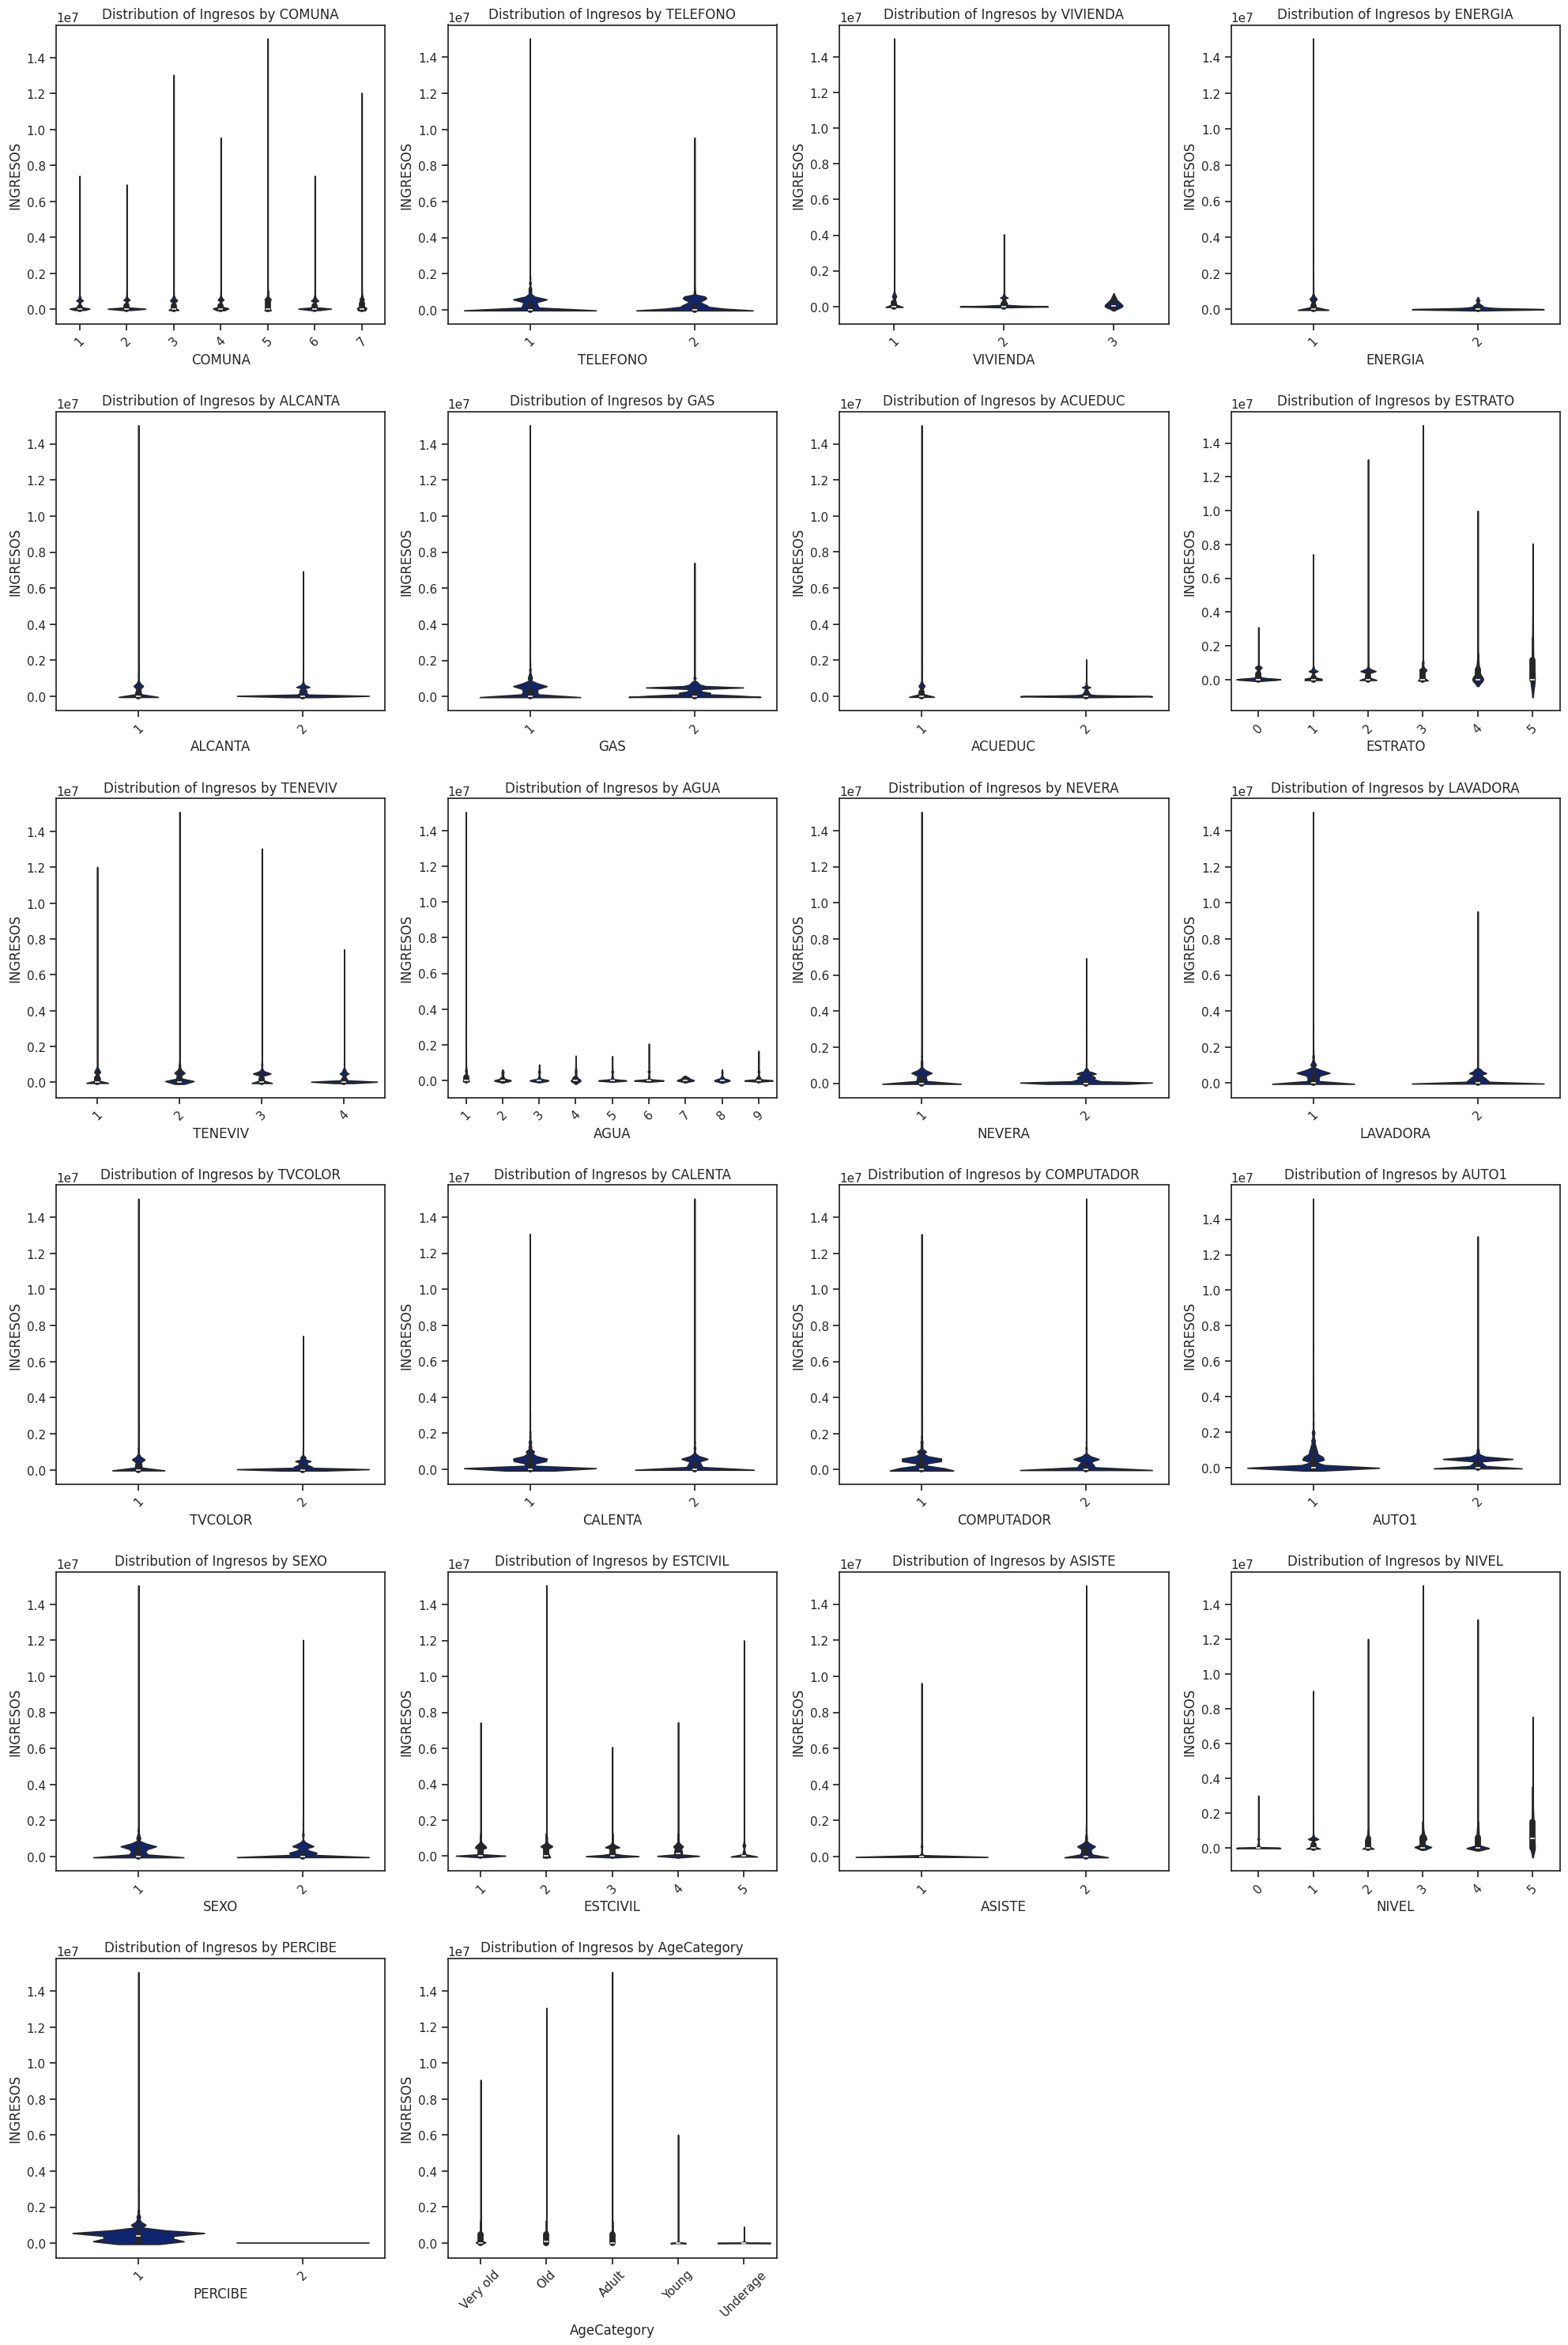

In [ ]:
columns_to_object_disp = ['COMUNA', 'TELEFONO', 'VIVIENDA', 'ENERGIA', 'ALCANTA',
                          'GAS', 'ACUEDUC', 'ESTRATO', 'TENEVIV', 'AGUA', 'NEVERA',
                          'LAVADORA', 'TVCOLOR', 'CALENTA', 'COMPUTADOR', 'AUTO1',
                          'SEXO', 'ESTCIVIL', 'ASISTE', 'NIVEL', 'PERCIBE', 'AgeCategory']

# Determinar el número de filas y columnas para subgráficos
n_features = len(columns_to_object_disp)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

# Crear la figura
plt.figure(figsize=(20, n_rows * 5))

# Graficar las variables categóricas con violin plots
for i, feature in enumerate(columns_to_object_disp, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x=feature, y='INGRESOS', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of Ingresos by {feature}')

plt.tight_layout()
plt.show()



**Detectar valores atípicos**

In [ ]:
# Definir una función para detectar valores atípicos usando percentiles
def detectar_outliers(df, variable, estrato, lower_percentile=0.01, upper_percentile=0.99):
    """
    Detectar valores atípicos en la columna 'variable' del DataFrame 'df' agrupados por 'estrato'.
    Los percentiles inferior y superior definen los límites para considerar valores atípicos.
    """
    outliers = pd.DataFrame()

    # Iterar sobre cada estrato
    for value in df[estrato].unique():
        subset = df[df[estrato] == value]
        lower_limit = subset[variable].quantile(lower_percentile)
        upper_limit = subset[variable].quantile(upper_percentile)

        # Seleccionar los outliers
        subset_outliers = subset[(subset[variable] < lower_limit) | (subset[variable] > upper_limit)]
        outliers = pd.concat([outliers, subset_outliers])

    return outliers

# Aplicar la función para detectar outliers en la variable 'INGRESOS' agrupados por 'ESTRATO'
outliers = detectar_outliers(df, 'INGRESOS', 'ESTRATO')

# Mostrar los outliers detectados
print("Valores atípicos detectados:")
print(outliers)

Valores atípicos detectados:
        COMUNA TELEFONO VIVIENDA ENERGIA ALCANTA GAS ACUEDUC ESTRATO TENEVIV  \
1462         1        1        1       1       1   2       1       2       1   
1510         1        1        1       1       1   2       1       2       1   
1685         1        1        1       1       1   2       1       2       1   
2053         1        1        1       1       1   2       1       2       1   
2485         1        1        1       1       1   2       1       2       1   
...        ...      ...      ...     ...     ...  ..     ...     ...     ...   
915796       7        1        1       1       1   1       1       4       3   
915827       7        1        1       1       1   1       1       4       3   
915845       7        1        1       1       1   1       1       4       2   
1009568      7        1        1       1       1   1       1       4       2   
913030       7        2        1       1       1   1       1       5       1   

        AG

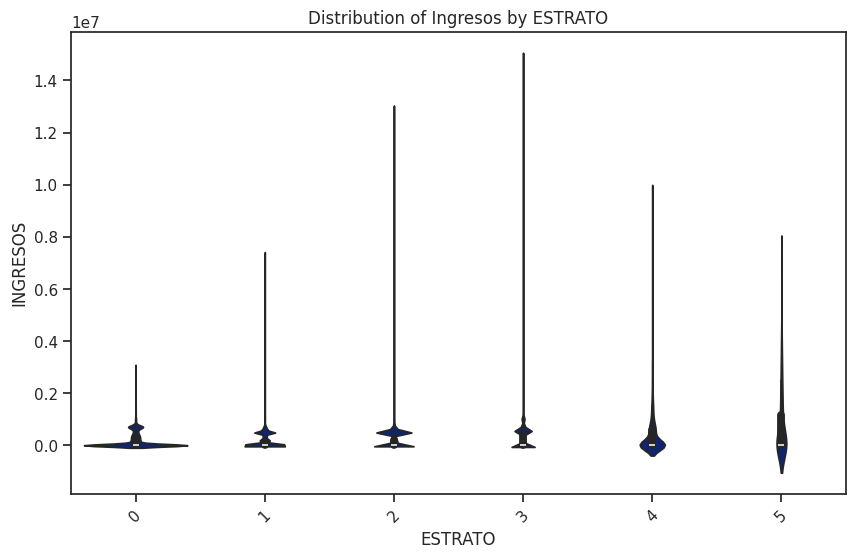

In [ ]:
# Establecer la variable categórica de interés
feature = 'ESTRATO'

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar la distribución de los ingresos por estrato
sns.violinplot(x=feature, y='INGRESOS', data=df)
plt.xticks(rotation=45)
plt.title(f'Distribution of Ingresos by {feature}')
plt.show()


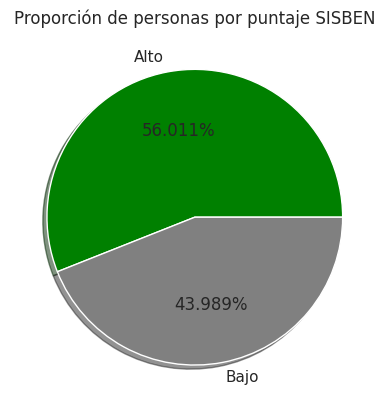

In [ ]:
# Realizar el conteo del número de registros de la variable 'Puntaje_Categorico' y graficarlos en una gráfica de torta.
plt.pie(x = df['Puntaje_Categorico'].value_counts() ,autopct='%1.3f%%' ,labels=['Alto', 'Bajo'], colors=['green', 'gray'], shadow=True)
plt.title('Proporción de personas por puntaje SISBEN')
plt.show()


**Análisis de Correlación entre variables**


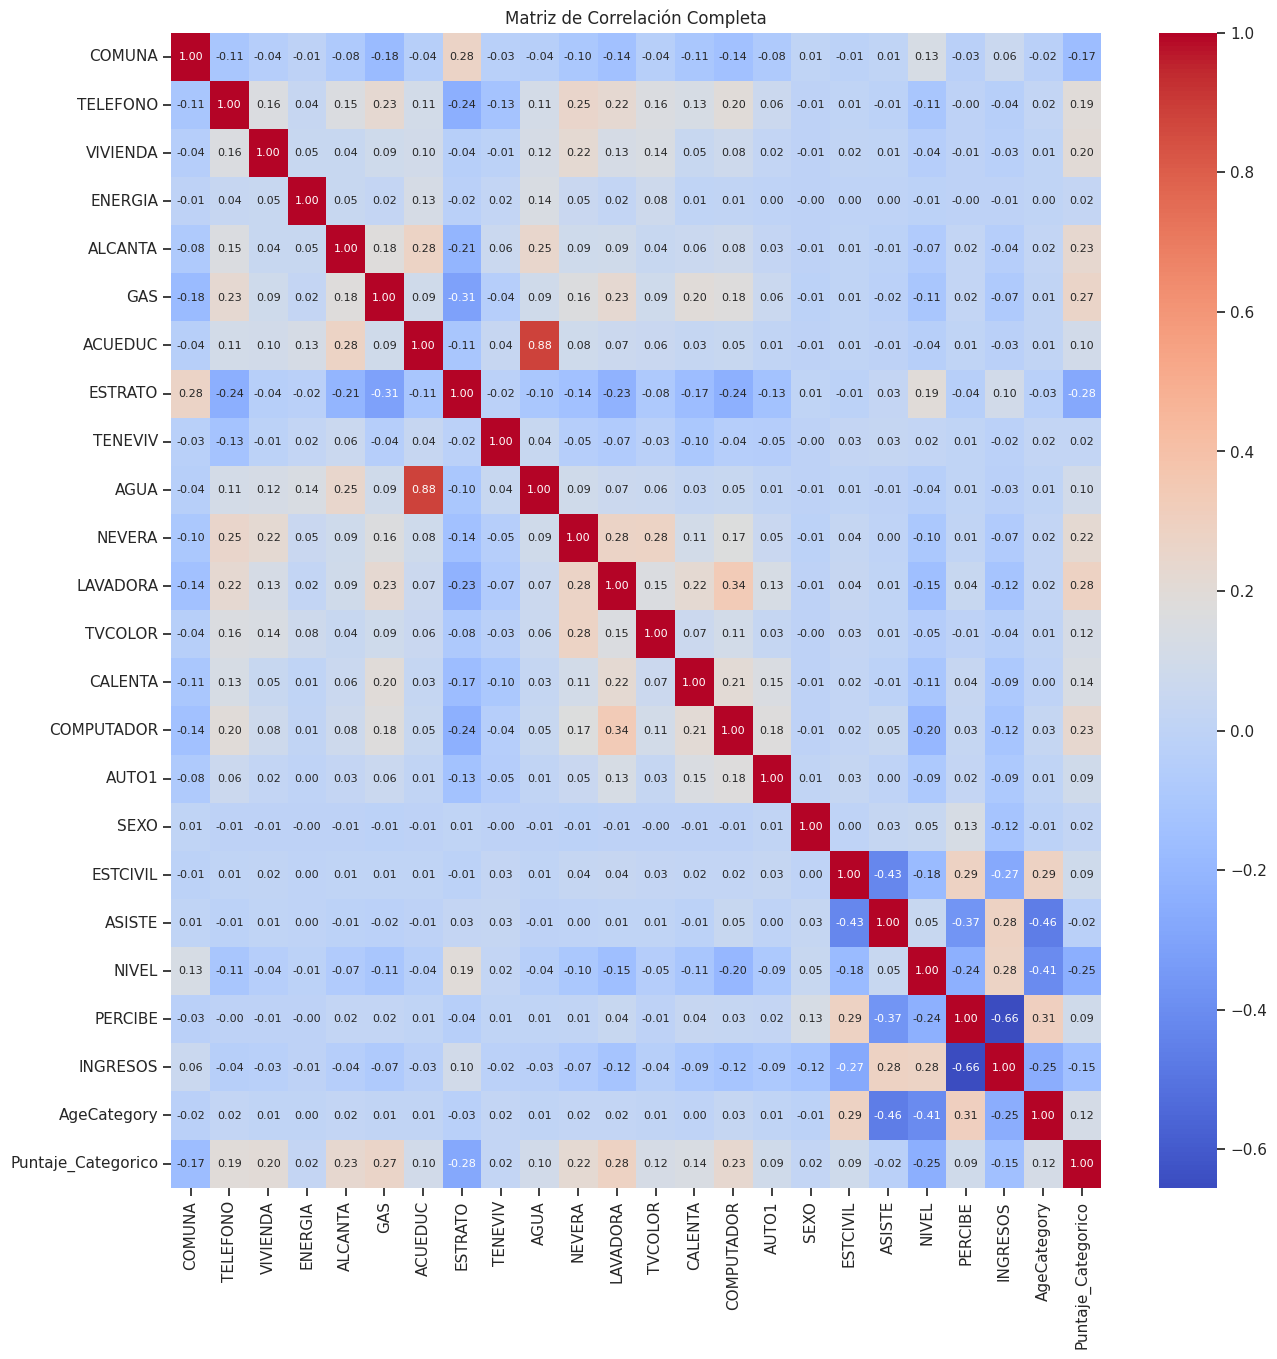

In [ ]:
# Asegurar que las variables categóricas estén en formato 'category' para las operaciones de correlación
categorical_cols = ['COMUNA', 'TELEFONO', 'VIVIENDA', 'ENERGIA', 'ALCANTA', 'GAS', 'ACUEDUC', 'ESTRATO',
                    'TENEVIV', 'AGUA', 'NEVERA', 'LAVADORA', 'TVCOLOR', 'CALENTA', 'COMPUTADOR', 'AUTO1',
                    'SEXO', 'ESTCIVIL', 'ASISTE', 'NIVEL', 'PERCIBE', 'AgeCategory', 'Puntaje_Categorico']

for col in categorical_cols:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = df[col].astype('category').cat.codes

# Calculando la matriz de correlación
correlation_matrix = df.corr()

# Visualizando la matriz de correlación con un tamaño de fuente más pequeño para las anotaciones
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, annot_kws={"size": 8})
plt.title("Matriz de Correlación Completa")
plt.show()

In [ ]:
# Crear Lista de variables numéricas
numCols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()

# Crear Lista de variables categóricas
catCols = df.select_dtypes(include = ["object", 'category']).columns.tolist()

In [ ]:
# Identificación de valores nulos para las variables numéricas
for col in df[numCols]:
    print (col, np.sum(pd.isnull(df[col])))

INGRESOS 0


In [ ]:
# Identificación de valores nulos para las variables categóricas
for col in df[catCols]:
    print (col, np.sum(pd.isnull(df[col])))

**Balanceo de variables de salida.**

In [ ]:
# Instalar libreria imblearn, herramienta para tratar con datos desbalanceados en problemas de aprendizaje automático
!pip install imblearn

In [ ]:
# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase
# minoritaria para igualar el número de muestras entre las diferentes clases.
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(df.drop('Puntaje_Categorico', axis=1), df['Puntaje_Categorico'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns=df.columns.drop('Puntaje_Categorico'))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
df_balanced = pd.concat([df1, df2], axis=1)

In [ ]:
# Evidenciar el dataset balanceado
df_balanced.head()

,COMUNA,TELEFONO,VIVIENDA,ENERGIA,ALCANTA,GAS,ACUEDUC,ESTRATO,TENEVIV,AGUA,...,COMPUTADOR,AUTO1,SEXO,ESTCIVIL,ASISTE,NIVEL,PERCIBE,INGRESOS,AgeCategory,Puntaje_Categorico
0,0,0,0,0,0,1,0,2,2,0,...,1,1,1,4,1,1,0,0.0,3,1
1,0,0,0,0,0,1,0,1,0,0,...,1,1,0,1,1,1,1,0.0,3,1
2,0,0,0,0,0,1,0,1,0,0,...,1,1,1,1,1,1,1,0.0,3,1
3,0,0,0,0,0,1,0,1,0,0,...,1,1,0,4,1,1,0,0.0,1,1
4,0,0,0,0,0,1,0,1,0,0,...,1,1,1,4,1,1,1,0.0,0,1


**Creación de variables Dummies.**

In [ ]:
# Disminuir el número de registros del dataset a una muestra aleatoria de 100000 (Cien mil) registros
semilla_aleatoria = 67
df = df.sample(n=100000, random_state=semilla_aleatoria)

In [ ]:
# Definición de columnas categóricas y numéricas

# Variables categóricas a incluir
columns_to_object = ['COMUNA', 'TELEFONO', 'VIVIENDA', 'ENERGIA', 'ALCANTA',
                     'GAS', 'ACUEDUC', 'ESTRATO', 'TENEVIV', 'AGUA', 'NEVERA', 'LAVADORA', 'TVCOLOR',
                     'CALENTA', 'COMPUTADOR', 'AUTO1', 'SEXO', 'ESTCIVIL',
                     'ASISTE', 'NIVEL', 'PERCIBE', 'AgeCategory', 'Puntaje_Categorico']

# Variable numérica a incluir
numeric_columns = ['INGRESOS']

# Aplicar LabelEncoder a las variables categóricas binarias
le = LabelEncoder()

# Convertir variables categóricas binarias a códigos numéricos
for col in columns_to_object:
    if len(df[col].unique()) <= 2:
        df[col] = le.fit_transform(df[col])

# Crear un nuevo DataFrame con las variables categóricas y numéricas, y la variable de salida
df_categorical = df[columns_to_object]
df_numerical = df[numeric_columns]

# Concatenar las variables categóricas (convertidas) y numéricas en un nuevo DataFrame
df_combined = pd.concat([df_categorical, df_numerical], axis=1)

# Generar variables dummies para las variables categóricas con más de dos categorías, excluyendo 'Puntaje_Categorico'
categorical_multiclass = [col for col in columns_to_object if len(df[col].unique()) > 2 and col != 'Puntaje_Categorico']
df_combined = pd.get_dummies(df_combined, columns=categorical_multiclass, drop_first=False)

# Convertir booleanos a enteros
df_combined = df_combined.astype(int)

# Aplicar LabelEncoder a la variable de salida
output_var = 'Puntaje_Categorico'
df_combined[output_var] = le.fit_transform(df_combined[output_var])

# Definir las variables de entrada (X) y la variable de salida (y)
X = df_combined.drop(columns=[output_var])
y = df_combined[output_var]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=123,
    shuffle=True
)

# Mostrar las primeras filas de los conjuntos de entrenamiento
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_test:")
print(y_test.head())

X_train:
        TELEFONO  ENERGIA  ALCANTA  GAS  ACUEDUC  NEVERA  LAVADORA  TVCOLOR  \
35860          1        0        1    1        0       0         1        0   
894090         0        0        0    1        0       0         1        0   
76686          0        0        0    1        0       0         1        0   
437758         0        0        0    1        0       0         1        0   
854253         0        0        0    1        0       0         1        0   

        CALENTA  COMPUTADOR  ...  NIVEL_1  NIVEL_2  NIVEL_3  NIVEL_4  NIVEL_5  \
35860         1           1  ...        0        1        0        0        0   
894090        1           1  ...        0        1        0        0        0   
76686         1           1  ...        0        1        0        0        0   
437758        1           1  ...        0        1        0        0        0   
854253        1           1  ...        0        0        0        0        0   

        AgeCategory_0  AgeCat

In [ ]:
# Aplicación de la función de usuario Dummies: one-hot encoding
df_combined =pd.get_dummies(df_combined)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 193932 to 542888
Data columns (total 60 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   TELEFONO            100000 non-null  int64
 1   ENERGIA             100000 non-null  int64
 2   ALCANTA             100000 non-null  int64
 3   GAS                 100000 non-null  int64
 4   ACUEDUC             100000 non-null  int64
 5   NEVERA              100000 non-null  int64
 6   LAVADORA            100000 non-null  int64
 7   TVCOLOR             100000 non-null  int64
 8   CALENTA             100000 non-null  int64
 9   COMPUTADOR          100000 non-null  int64
 10  AUTO1               100000 non-null  int64
 11  SEXO                100000 non-null  int64
 12  ASISTE              100000 non-null  int64
 13  PERCIBE             100000 non-null  int64
 14  Puntaje_Categorico  100000 non-null  int64
 15  INGRESOS            100000 non-null  int64
 16  COMUNA_0            

In [ ]:
# Revisar las nuevas columnas
df_combined.columns

Index(['TELEFONO', 'ENERGIA', 'ALCANTA', 'GAS', 'ACUEDUC', 'NEVERA',
       'LAVADORA', 'TVCOLOR', 'CALENTA', 'COMPUTADOR', 'AUTO1', 'SEXO',
       'ASISTE', 'PERCIBE', 'Puntaje_Categorico', 'INGRESOS', 'COMUNA_0',
       'COMUNA_1', 'COMUNA_2', 'COMUNA_3', 'COMUNA_4', 'COMUNA_5', 'COMUNA_6',
       'VIVIENDA_0', 'VIVIENDA_1', 'VIVIENDA_2', 'ESTRATO_0', 'ESTRATO_1',
       'ESTRATO_2', 'ESTRATO_3', 'ESTRATO_4', 'ESTRATO_5', 'TENEVIV_0',
       'TENEVIV_1', 'TENEVIV_2', 'TENEVIV_3', 'AGUA_0', 'AGUA_1', 'AGUA_2',
       'AGUA_3', 'AGUA_4', 'AGUA_5', 'AGUA_7', 'AGUA_8', 'ESTCIVIL_0',
       'ESTCIVIL_1', 'ESTCIVIL_2', 'ESTCIVIL_3', 'ESTCIVIL_4', 'NIVEL_0',
       'NIVEL_1', 'NIVEL_2', 'NIVEL_3', 'NIVEL_4', 'NIVEL_5', 'AgeCategory_0',
       'AgeCategory_1', 'AgeCategory_2', 'AgeCategory_3', 'AgeCategory_4'],
      dtype='object')

**División del conjunto de datos (train-test).**

In [ ]:
# Se crea una lista con todas las varibles de entrada

vDep = list(df_combined.columns)
vDep.remove('Puntaje_Categorico')

# Se establece las variables de entrada 'X' y la variable de salida 'y'
X = df_combined.drop(columns ='Puntaje_Categorico')
y = df_combined['Puntaje_Categorico']

In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [ ]:
# Se establecen las variables numéricas a escalar

# Num_vars se le asigna la lista con las variables numericas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['INGRESOS']


In [ ]:
# Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,INGRESOS
146079,0.0000
597210,0.0698
523011,0.0000
716940,0.0000
606596,0.0000


**Creación y ejecución de modelos.**

**REGRESION LOGISTICA**

In [ ]:
# Creación del modelo
modelLRovrlbfgs       = LogisticRegression(multi_class = "ovr", solver='lbfgs',  random_state=0)


# Entrenamiento del modelo
modelLRovrlbfgs.fit(X_train, y_train)


LogisticRegression(multi_class='ovr', random_state=0)

In [ ]:
# Se realiza la predicción de cada uno de los modelos creados utilizando los datos prueba
y_predovrlbfgs = modelLRovrlbfgs.predict(X_test)

In [ ]:
# Se imprimen las métricas de exactitud de los modelos a partir de los datos de prueba

print("="*5 + f" Accuracy Logistic Regression " + "="*20)
print()
print("ovr - lbfgs        :",metrics.accuracy_score(y_test, y_predovrlbfgs))

===== Accuracy Logistic Regression ====================

ovr - lbfgs        : 0.722


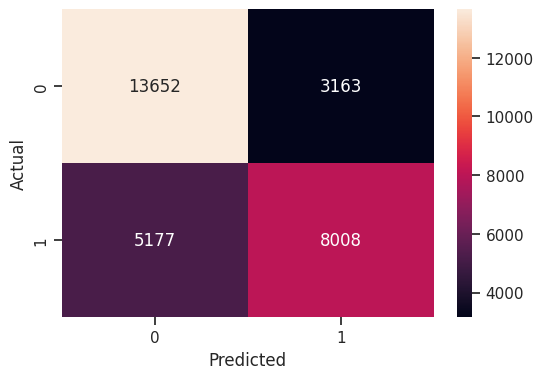

              precision    recall  f1-score   support

           0       0.73      0.81      0.77     16815
           1       0.72      0.61      0.66     13185

    accuracy                           0.72     30000
   macro avg       0.72      0.71      0.71     30000
weighted avg       0.72      0.72      0.72     30000



In [ ]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_predovrlbfgs)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_predovrlbfgs))

**RANDOM FOREST**

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
rf_param_grid = ParameterGrid(
    {
        'n_estimators': [150],  # Número de árboles en el bosque
        'max_features': [5, 7, 9],  # Número máximo de características consideradas para dividir un nodo
        'max_depth': [None, 3, 10, 20],  # Máxima profundidad de cada árbol
        'criterion': ['gini', 'entropy']  # Medida de calidad de la división
    }
)

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
rf_resultados = {'params': [], 'oob_accuracy': []}

for params in rf_param_grid:
    rf_modelo = RandomForestClassifier(
        oob_score=True,  # Usar muestras out-of-bag para estimar la precisión
        n_jobs=-1,  # Usar todos los núcleos disponibles
        random_state=123,  # Semilla de aleatoriedad para reproducibilidad
        **params  # Expansión de los parámetros del grid
    )

    rf_modelo.fit(X_train, y_train)
    rf_resultados['params'].append(params)
    rf_resultados['oob_accuracy'].append(rf_modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
rf_resultados_df = pd.DataFrame(rf_resultados)
# Expandir la columna 'params' en múltiples columnas y se concatenan de nuevo al dataframe
rf_resultados_df = pd.concat([rf_resultados_df, rf_resultados_df['params'].apply(pd.Series)], axis=1)
rf_resultados_df = rf_resultados_df.sort_values('oob_accuracy', ascending=False)  # Ordenar por precisión
rf_resultados_df = rf_resultados_df.drop(columns='params')  # Eliminar la columna original de parámetros

print(rf_resultados_df.head())  # Mostrar los mejores modelos según la precisión OOB


Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

In [ ]:
# Grid de hiperparámetros evaluados para Random Forest utilizando GridSearchCV
# ==============================================================================
rf_gs_param_grid = {
    'n_estimators': [150],  # Número de árboles
    'max_features': [5, 7, 9],  # Número máximo de características consideradas para dividir un nodo
    'max_depth': [None, 3, 10, 20],  # Máxima profundidad de cada árbol
    'criterion': ['gini', 'entropy']  # Criterio para la calidad de la división
}

# Búsqueda por GridSearchCV con validación cruzada
# ==============================================================================
rf_gs_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=123),
    param_grid=rf_gs_param_grid,
    scoring='accuracy',  # Métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos disponibles
    refit=True,  # Reajusta el mejor modelo encontrado al conjunto completo de datos
    verbose=0,  # Nivel de mensajes sobre el proceso (0 es silencioso)
    return_train_score=True  # Devuelve los resultados del entrenamiento además de la validación
)

# Ajuste del modelo utilizando el conjunto de entrenamiento
rf_gs_grid.fit(X=X_train, y=y_train)

# Resultados de la validación cruzada
# ==============================================================================
rf_gs_resultados = pd.DataFrame(rf_gs_grid.cv_results_)
# Filtrar las columnas relevantes y ordenar por el score de prueba
rf_gs_resultados_filtrados = rf_gs_resultados.filter(regex='(param*|mean_train_score|mean_test_score|std_train_score|std_test_score)') \
                                              .drop(columns='params') \
                                              .sort_values('mean_test_score', ascending=False) \
                                              .head(4)  # Mostrar los 4 mejores modelos

print(rf_gs_resultados_filtrados)


   param_criterion param_max_depth param_max_features param_n_estimators  \
7             gini              10                  7                150   
6             gini              10                  5                150   
21         entropy              20                  5                150   
20         entropy              10                  9                150   

    mean_test_score  std_test_score  mean_train_score  std_train_score  
7            0.7245          0.0033            0.7331           0.0011  
6            0.7238          0.0028            0.7320           0.0008  
21           0.7236          0.0013            0.8496           0.0007  
20           0.7234          0.0032            0.7325           0.0009  


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(rf_gs_grid.best_params_, ":", rf_gs_grid.best_score_, rf_gs_grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} : 0.7245142857142858 accuracy


In [ ]:
# Asignación del mejor modelo encontrado por GridSearchCV a una variable
# ==============================================================================
rf_gs_modelo_final = rf_gs_grid.best_estimator_
rf_gs_modelo_final

RandomForestClassifier(max_depth=10, max_features=7, n_estimators=150,
                       random_state=123)

In [ ]:
# Error de test del modelo final usando Random Forest
# ==============================================================================
rf_gs_y_pred = rf_gs_modelo_final.predict(X_test)

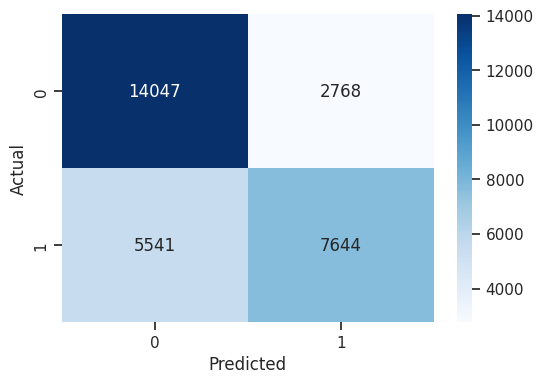

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     16815
           1       0.73      0.58      0.65     13185

    accuracy                           0.72     30000
   macro avg       0.73      0.71      0.71     30000
weighted avg       0.72      0.72      0.72     30000



In [ ]:
# Crear matriz de confusión utilizando las predicciones del modelo final de Random Forest
rf_gs_conf_mat = confusion_matrix(y_test, rf_gs_y_pred)

# Crear figura y ejes para el mapa de calor de la matriz de confusión
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(rf_gs_conf_mat,
            annot=True,  # agregar valores en cada celda
            fmt='d',    # formato de los valores (d = decimal)
            cmap='Blues')  # Color del mapa de calor

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Imprimir las medidas de rendimiento del modelo
print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, rf_gs_y_pred))

**ARBOLES DE DECISION**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Creación del modelo de Árbol de Decisión
# ==============================================================================
dt_modelo = DecisionTreeClassifier(
    max_depth=5,  # Profundidad máxima del árbol
    criterion='gini',  # Medida de la calidad de una división
    random_state=123  # Semilla para la aleatoriedad, garantiza reproducibilidad
)

# Entrenamiento del modelo de Árbol de Decisión
# ==============================================================================
dt_modelo.fit(X_train, y_train)

# Predicción con el conjunto de prueba utilizando el modelo de Árbol de Decisión
dt_y_pred = dt_modelo.predict(X_test)

# Evaluación del modelo de Árbol de Decisión
print("Reporte de clasificación para el Árbol de Decisión:")
print(classification_report(y_test, dt_y_pred))
print("Exactitud del modelo de Árbol de Decisión:", accuracy_score(y_test, dt_y_pred))

Reporte de clasificación para el Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76     16815
           1       0.72      0.51      0.60     13185

    accuracy                           0.70     30000
   macro avg       0.70      0.68      0.68     30000
weighted avg       0.70      0.70      0.69     30000

Exactitud del modelo de Árbol de Decisión: 0.6970333333333333


Profundidad del árbol: 5
Número de nodos terminales: 30


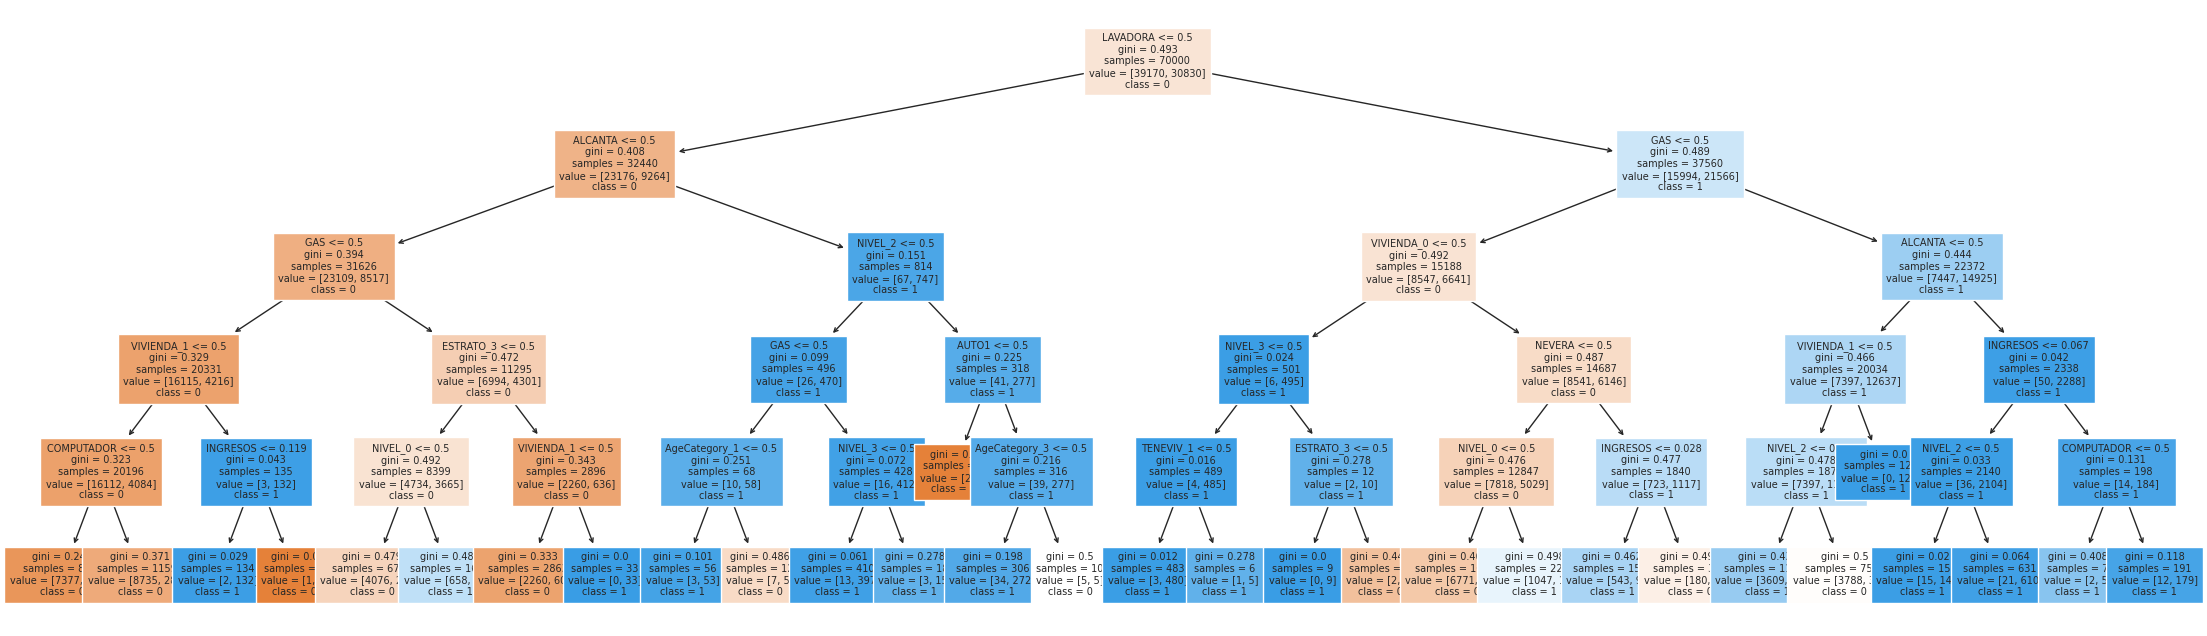

In [ ]:
from sklearn.tree import plot_tree

# Estructura del árbol creado para el modelo de Árbol de Decisión
# ==============================================================================
fig, ax = plt.subplots(figsize=(28, 8))

# Información sobre el árbol de Decisión
print(f"Profundidad del árbol: {dt_modelo.get_depth()}")
print(f"Número de nodos terminales: {dt_modelo.get_n_leaves()}")

# Obtener nombres de las clases a partir de los datos de entrenamiento para el Árbol de Decisión
dt_class_names = np.unique(y_train).astype(str)

# Visualización del árbol de Decisión
dt_plot = plot_tree(
    decision_tree=dt_modelo,
    feature_names=X_train.columns,
    class_names=dt_class_names,
    filled=True,
    impurity=True,
    fontsize=7,
    ax=ax
)

plt.show()

**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Creación de los modelos Naive Bayes con distintivo
nb_modelGNB = GaussianNB()  # Modelo Naive Bayes para distribuciones Gaussianas
nb_modelBNB = BernoulliNB(binarize=0.5)  # Modelo Naive Bayes para características binarias
nb_modelMNB = MultinomialNB()  # Modelo Naive Bayes para conteo de frecuencias o características discretas

# Entrenamiento de los modelos Naive Bayes
nb_modelGNB.fit(X_train, y_train)
nb_modelBNB.fit(X_train, y_train)
nb_modelMNB.fit(X_train, y_train)

print("Todos los modelos Naive Bayes han sido entrenados.")


Todos los modelos Naive Bayes han sido entrenados.


In [ ]:
from sklearn.metrics import accuracy_score

# Predicción con GaussianNB en el conjunto de entrenamiento usando la instancia correcta
nb_y_modelGNBT = nb_modelGNB.predict(X_train)

# Calcular la exactitud de GaussianNB en el conjunto de entrenamiento
nb_accuracy_gnb = accuracy_score(y_train, nb_y_modelGNBT)
print("Accuracy of GaussianNB on training set:", nb_accuracy_gnb)



Accuracy of GaussianNB on training set: 0.6353857142857143


In [ ]:
# Predicción con los modelos Naive Bayes en el conjunto de prueba
nb_y_modelGNB = nb_modelGNB.predict(X_test)
nb_y_modelBNB = nb_modelBNB.predict(X_test)
nb_y_modelMNB = nb_modelMNB.predict(X_test)

In [ ]:
print("="*5 + " Accuracy Gaussian NB " + "="*20)
print()
print("GaussianNB:", metrics.accuracy_score(y_test, nb_y_modelGNB))
print("BernoulliNB:", metrics.accuracy_score(y_test, nb_y_modelBNB))
print("MultinomialNB:", metrics.accuracy_score(y_test, nb_y_modelMNB))

===== Accuracy Gaussian NB ====================

GaussianNB: 0.6370333333333333
BernoulliNB: 0.7125666666666667
MultinomialNB: 0.7059666666666666


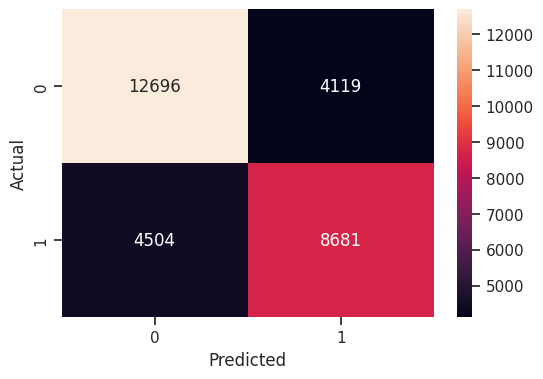

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     16815
           1       0.68      0.66      0.67     13185

    accuracy                           0.71     30000
   macro avg       0.71      0.71      0.71     30000
weighted avg       0.71      0.71      0.71     30000



In [ ]:
nb_y_modelBNB = nb_modelBNB.predict(X_test)

# Creación de la matriz de confusión para BernoulliNB
nb_conf_mat = confusion_matrix(y_test, nb_y_modelBNB)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(nb_conf_mat,
            annot=True,  # Mostrar los valores dentro de los cuadros
            fmt='d',  # Formato de los números como enteros (decimales)
            xticklabels=df_combined['Puntaje_Categorico'].sort_values().unique(),
            yticklabels=df_combined['Puntaje_Categorico'].sort_values().unique()
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Imprimir el reporte de clasificación para BernoulliNB
print(classification_report(y_test, nb_y_modelBNB))

**HistGradient Boosting Classifier**

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Se crea una lista con todas las variables de entrada
vDep = list(df_combined.columns)
vDep.remove('Puntaje_Categorico')

# Se establece las variables de entrada 'X' y la variable de salida 'y'
X = df_combined.drop(columns='Puntaje_Categorico')
y = df_combined['Puntaje_Categorico']

In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y.values.reshape(-1, 1),
    train_size=0.7,
    random_state=123,
    shuffle=True
)

In [ ]:
# Escalar Variables numéricas
pd.set_option('display.float_format', lambda x: '%.4f' % x)
num_vars = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
# Grid de hiperparámetros evaluados
hgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_iter': [100, 200],  # Número máximo de iteraciones
    'max_leaf_nodes': [31, 63],  # Número máximo de nodos hoja
    'max_depth': [None, 10],  # Profundidad máxima de cada árbol
    'min_samples_leaf': [20, 50]  # Número mínimo de muestras en un nodo hoja
}

# Búsqueda por grid search con validación cruzada
hgb_grid = GridSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=123),
    param_grid=hgb_param_grid,
    scoring='accuracy',  # Métrica de evaluación
    n_jobs=-1,  # Usar todos los núcleos disponibles
    refit=True,  # Reajusta el mejor modelo encontrado al conjunto completo de datos
    verbose=0,  # Nivel de mensajes sobre el proceso (0 es silencioso)
    return_train_score=True  # Devuelve los resultados del entrenamiento además de la validación
)

# Ajuste del modelo usando el conjunto de entrenamiento
hgb_grid.fit(X=X_train, y=y_train.ravel())

# Resultados de la validación cruzada
hgb_resultados = pd.DataFrame(hgb_grid.cv_results_)
# Filtrar las columnas relevantes y ordenar por el score de prueba
hgb_resultados_filtrados = hgb_resultados.filter(regex='(param*|mean_train_score|mean_test_score|std_train_score|std_test_score)') \
                                          .drop(columns='params') \
                                          .sort_values('mean_test_score', ascending=False) \
                                          .head(4)  # Mostrar los 4 mejores modelos

print(hgb_resultados_filtrados)

   param_learning_rate param_max_depth param_max_iter param_max_leaf_nodes  \
31              0.1000              10            200                   63   
27              0.1000              10            100                   63   
28              0.1000              10            200                   31   
24              0.1000              10            100                   31   

   param_min_samples_leaf  mean_test_score  std_test_score  mean_train_score  \
31                     50           0.7300          0.0024            0.7423   
27                     50           0.7300          0.0024            0.7423   
28                     20           0.7299          0.0021            0.7387   
24                     20           0.7298          0.0021            0.7386   

    std_train_score  
31           0.0006  
27           0.0006  
28           0.0009  
24           0.0008  


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(hgb_grid.best_params_, ":", hgb_grid.best_score_, hgb_grid.scoring)

# Asignación del mejor modelo encontrado por GridSearchCV a una variable
hgb_modelo_final = hgb_grid.best_estimator_

# Predicción con el modelo final en el conjunto de prueba
hgb_y_pred = hgb_modelo_final.predict(X_test)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.1, 'max_depth': 10, 'max_iter': 100, 'max_leaf_nodes': 63, 'min_samples_leaf': 50} : 0.7299571428571429 accuracy


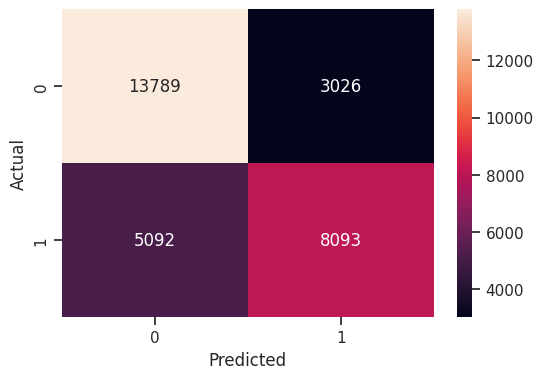

Reporte de clasificación para HistGradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77     16815
           1       0.73      0.61      0.67     13185

    accuracy                           0.73     30000
   macro avg       0.73      0.72      0.72     30000
weighted avg       0.73      0.73      0.73     30000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Crear matriz de confusión utilizando las predicciones del modelo final de HistGradient Boosting
hgb_conf_mat = confusion_matrix(y_test, hgb_y_pred)

# Crear figura y ejes para el mapa de calor de la matriz de confusión
fig, ax = plt.subplots(figsize=(6, 4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(hgb_conf_mat, annot=True, fmt='d')

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Imprimir las medidas de rendimiento del modelo
print("Reporte de clasificación para HistGradient Boosting Classifier:")
print(classification_report(y_test, hgb_y_pred))

**9. Evaluación de modelos.**

_______________________________________________________________
_______________________________________________________________

**CURVA ROC**

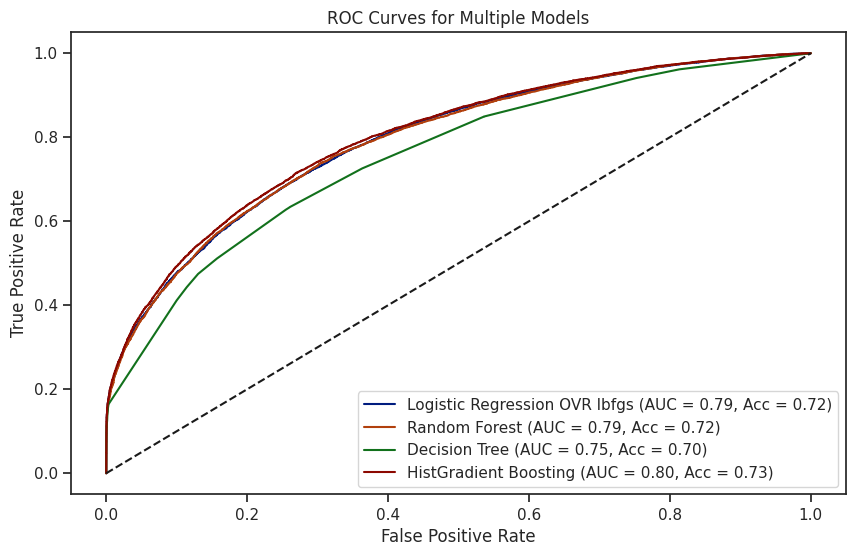

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Asegurarse de que todos los modelos están entrenados y listos para predecir probabilidades

# Regresión Logística
probs_lr_lbfgs = modelLRovrlbfgs.predict_proba(X_test)[:, 1]

# Random Forest
probs_rf = rf_gs_modelo_final.predict_proba(X_test)[:, 1]

# Árbol de Decisión
probs_dt = dt_modelo.predict_proba(X_test)[:, 1]

# HistGradient Boosting
probs_hgb = hgb_modelo_final.predict_proba(X_test)[:, 1]

# Calcular AUC y generar Curvas ROC
fpr_lr_lbfgs, tpr_lr_lbfgs, _ = roc_curve(y_test, probs_lr_lbfgs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)
fpr_hgb, tpr_hgb, _ = roc_curve(y_test, probs_hgb)

# Calcular AUC para cada modelo
auc_lr_lbfgs = roc_auc_score(y_test, probs_lr_lbfgs)
auc_rf = roc_auc_score(y_test, probs_rf)
auc_dt = roc_auc_score(y_test, probs_dt)
auc_hgb = roc_auc_score(y_test, probs_hgb)

# Calcular accuracy para cada modelo
accuracy_lr_lbfgs = metrics.accuracy_score(y_test, modelLRovrlbfgs.predict(X_test))
accuracy_rf = metrics.accuracy_score(y_test, rf_gs_modelo_final.predict(X_test))
accuracy_dt = metrics.accuracy_score(y_test, dt_modelo.predict(X_test))
accuracy_hgb = metrics.accuracy_score(y_test, hgb_modelo_final.predict(X_test))

# Crear la figura para graficar
fig = plt.figure(figsize=(10, 6))

# Graficar la Curva ROC para cada modelo
plt.plot(fpr_lr_lbfgs, tpr_lr_lbfgs, label=f'Logistic Regression OVR lbfgs (AUC = {auc_lr_lbfgs:.2f}, Acc = {accuracy_lr_lbfgs:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f}, Acc = {accuracy_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f}, Acc = {accuracy_dt:.2f})')
plt.plot(fpr_hgb, tpr_hgb, label=f'HistGradient Boosting (AUC = {auc_hgb:.2f}, Acc = {accuracy_hgb:.2f})')

# Línea base para el clasificador aleatorio
plt.plot([0, 1], [0, 1], 'k--')

# Añadir decoraciones al gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')

# Añadir leyenda y mostrar el gráfico
plt.legend(loc='lower right')
plt.show()

**Conclusión con base a la Curva ROC**

Con base en la curva ROC, el modelo de HistGradient Boosting presenta la mayor área bajo la curva (AUC = 0.80) y una precisión (Acc) de 0.73, demostrando ser el más robusto en la clasificación entre los modelos evaluados. Le sigue la Regresión Logística con OVR y lbfgs, y el Random Forest, ambos con AUC de 0.79 y una precisión de 0.72, lo que indica que son también modelos muy efectivos, aunque ligeramente inferiores al HistGradient Boosting.

El modelo de Árbol de Decisión tiene un AUC más bajo (0.75) y una precisión de 0.70, lo que sugiere que es el menos efectivo entre los modelos comparados, aunque todavía muestra un desempeño razonable.

En conclusión, la comparación sugiere que el HistGradient Boosting es el modelo más adecuado para clasificar el puntaje del SISBEN, dado su mejor balance entre TPR y FPR, así como su mayor precisión global.








**Resultados Finales del modelamiento**

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score

# Lista de modelos ya entrenados y listos para predecir
models = {
    'Logistic Regression OVR lbfgs': modelLRovrlbfgs,
    'Random Forest': rf_gs_modelo_final,
    'Decision Tree': dt_modelo,
    'HistGradient Boosting': hgb_modelo_final
}

# DataFrame para almacenar los resultados
MLA_columns = ['MLA Name', 'MLA Train Accuracy', 'MLA Test Accuracy', 'MLA Precision', 'MLA Recall', 'MLA AUC']
MLA_compare = pd.DataFrame(columns=MLA_columns)

row_index = 0

# Evaluar cada modelo
for name, model in models.items():
    # Predecir
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calcular métricas
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    precision = precision_score(y_test, y_test_pred) * 100
    recall = recall_score(y_test, y_test_pred) * 100
    auc = roc_auc_score(y_test, y_test_prob) * 100

    # Almacenar resultados
    MLA_compare.loc[row_index] = [name, train_accuracy, test_accuracy, precision, recall, auc]
    row_index += 1

# Mostrar los resultados
MLA_compare


,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precision,MLA Recall,MLA AUC
0,Logistic Regression OVR lbfgs,72.3886,72.1767,71.4298,61.1528,79.4529
1,Random Forest,73.1743,72.3567,73.1936,58.5438,79.3533
2,Decision Tree,69.8814,69.7100,71.8257,51.1414,75.4757
3,HistGradient Boosting,74.2271,72.9400,72.7853,61.3804,80.0493


**Conclusiones finales**

Con base a la evaluación de los diferentes modelos, se determinó que el modelo de HistGradient Boosting presenta el mejor rendimiento con un AUC de 80.0493%, lo que indica una alta capacidad para distinguir entre las clases "alto" y "bajo" del puntaje SISBEN. Este modelo también tiene la mayor precisión y recall entre los modelos evaluados, lo que sugiere un equilibrio óptimo entre identificar correctamente las instancias positivas y negativas.

Random Forest y Logistic Regression OVR lbfgs también muestran un rendimiento competitivo, con AUCs de 79.3533% y 79.4529% respectivamente. Ambos modelos presentan una precisión elevada, aunque el modelo de Logistic Regression tiene un mejor recall, lo que lo hace más robusto para aplicaciones donde es crucial minimizar los falsos negativos.

El Decision Tree tiene un desempeño más modesto en comparación con los otros modelos, con un AUC de 75.4757%, pero aún ofrece una precisión razonable. Esto puede hacerlo adecuado para implementaciones más simples o cuando se requiere una interpretación más transparente del modelo.

En conclusión, para la clasificación de puntajes SISBEN, el modelo de HistGradient Boosting es el más adecuado debido a su equilibrio óptimo en precisión, recall y capacidad para distinguir entre las clases. Este modelo maximiza la efectividad y precisión del sistema, haciendo que sea la mejor opción para la implementación en producción.









**Final**
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------